# Convolutional Neural Network (CNN) using Keras
This notebook will guide you through the process of creating a CNN model using Keras. Follow the steps and fill in the code blocks as you progress.

# Dataset Card: Men vs. Women Classification

## Overview
The Men vs. Women Classification dataset contains images of men and women intended for binary image classification tasks. The goal is to classify images based on gender.

- **Dataset URL:** [Men vs. Women Classification Dataset](https://www.kaggle.com/datasets/saadpd/menwomen-classification)
- **Dataset Size:** ~845 MB
- **Classes:** 2 (Men, Women)
- **Image Format:** JPEG

## Structure

### Folders
The dataset is organized into two main folders:

- `traindata/`:
  - `traindata/`: Contains the training images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

- `testdata/`:
  - `testdata/`: Contains the testing images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

### Example Files
Here are some example file names you might find in the dataset:

- `traindata/traindata/men/000000899.jpg`
- `traindata/traindata/women/00000001.jpg`
- `testdata/testdata/men/00000504.jpg`
- `testdata/testdata/women/00000002.jpg`

### Image Specifications
- **Resolution:** Varies
- **Color:** RGB

## Usage
This dataset is ideal for practicing binary image classification using Convolutional Neural Networks (CNNs). It can be used to train a model to distinguish between images of men and women.

## Step 1: Import Required Libraries
Begin by importing the necessary libraries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load and Preprocess Data
Load your dataset and preprocess it. This may include resizing images, normalizing pixel values, and splitting the data into training and validation sets.

In [ ]:
# Load and preprocess the data
# Hint: Use ImageDataGenerator for image preprocessing
# Example:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory('/content/drive/MyDrive/T5 Bootcamp/Dataset/week_4/archive/traindata/traindata', target_size=(64, 64), batch_size=64, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory('/content/drive/MyDrive/T5 Bootcamp/Dataset/week_4/archive/testdata/testdata', target_size=(64, 64), batch_size=64, class_mode='categorical', subset='validation')

Found 2313 images belonging to 2 classes.
Found 265 images belonging to 2 classes.


## Step 3: Data Augmentation
To prevent overfitting, augment your data using various transformations like rotation, zoom, flip, etc.

In [ ]:
# Data Augmentation
# Example:
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

## Step 4: Build the CNN Model
Define the architecture of your CNN model. Start with convolutional layers followed by pooling layers, and end with fully connected layers.

In [ ]:
# Build the model
# Example:
model = Sequential([
   Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
   MaxPooling2D(2, 2),
   Conv2D(64, (3, 3), activation='relu'),
   MaxPooling2D(2, 2),
   Flatten(),
   Dense(128, activation='relu'),
   Dropout(0.5),
   Dense(2, activation='softmax')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,410 (6.20 MB)

 Trainable params: 1,625,410 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Compile the Model
Compile your model by specifying the optimizer, loss function, and evaluation metrics.

In [ ]:
# Compile the model
# Example:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Step 6: Train the Model
Train your model using the training data and validate it using the validation data.

In [ ]:
# Train the model
# Example:
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 336s 8s/step - accuracy: 0.5968 - loss: 0.9433 - val_accuracy: 0.6868 - val_loss: 0.6192
Epoch 2/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6692 - loss: 0.6197 - val_accuracy: 0.7019 - val_loss: 0.5934
Epoch 3/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6748 - loss: 0.6076 - val_accuracy: 0.6906 - val_loss: 0.5711
Epoch 4/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6867 - loss: 0.5914 - val_accuracy: 0.7245 - val_loss: 0.5983
Epoch 5/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7231 - loss: 0.5487 - val_accuracy: 0.7358 - val_loss: 0.5346
Epoch 6/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7480 - loss: 0.5111 - val_accuracy: 0.7358 - val_loss: 0.4720
Epoch 7/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.7664 - loss: 0.4715 - val_accuracy: 0.7811 - val_loss: 0.4870
Epoch 8/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7887 - loss: 0.4443 - val_accuracy: 0.7736 - val_loss

## Step 7: Evaluate the Model
Evaluate the performance of your model using the validation set.

In [ ]:
# Evaluate the model
# Example:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 929ms/step - accuracy: 0.7635 - loss: 0.6747
Validation Loss: 0.697309672832489
Validation Accuracy: 0.7584905624389648


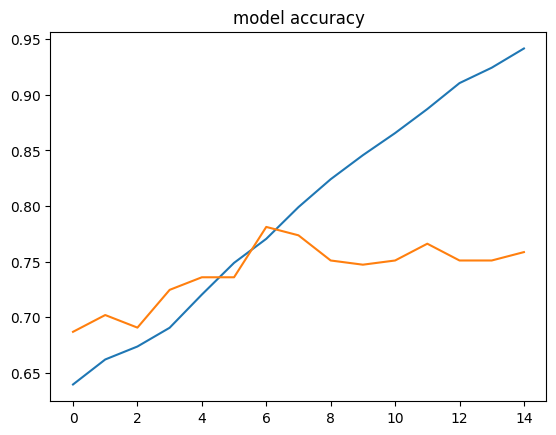

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')

plt.show()

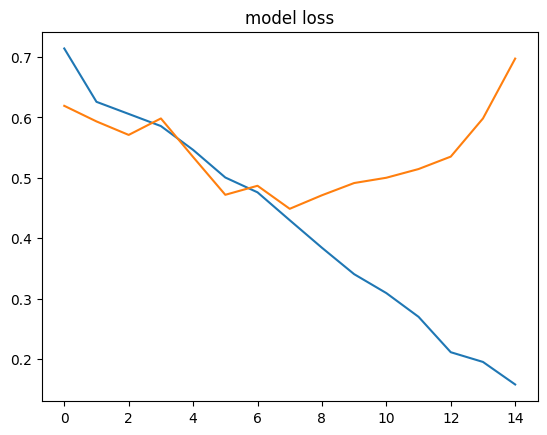

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')

plt.show()

# i see there is some overfit i can try different things to prevent that.

## Step 8: Save the Model
Finally, save your trained model for future use.

In [ ]:
# Save the model
# Example:
model.save('my_cnn_model.h5')